## **EDA**

EDA de los datasets limpios y optimizados antes 

In [1]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
user_items = pd.read_parquet(r'data\user_items.parquet')
user_reviews = pd.read_parquet(r'data\user_reviews.parquet')
steam_games = pd.read_parquet(r'data\steam_games.parquet')

### **PRIMER DATAFRAME user_items**

In [3]:
user_items

,user_id,item_id,title,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,30,Day of Defeat,7
2,76561197970982479,3830,Psychonauts,333
3,76561197970982479,2630,Call of Duty 2,75
4,76561197970982479,3900,Sid Meier's Civilization IV,338
...,...,...,...,...
2482762,76561198329548331,304930,Unturned,677
2482763,76561198329548331,227940,Heroes & Generals,43
2482764,76561198329548331,388490,One Way To Die: Steam Edition,3
2482765,76561198329548331,521570,You Have 10 Seconds 2,4


In [4]:
user_items.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482767 entries, 0 to 2482766
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   item_id           int64 
 2   title             object
 3   playtime_forever  int64 
dtypes: int64(2), object(2)
memory usage: 75.8+ MB


In [5]:
user_items.isnull().sum() # obtenemos la cantidad de valores nulos por columna

user_id             0
item_id             0
title               0
playtime_forever    0
dtype: int64

Nube de palabras con titulos de juegos

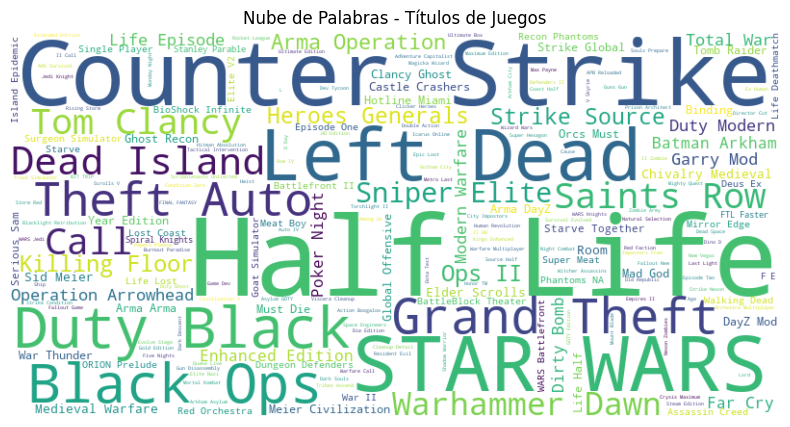

In [6]:
# Crear una cadena de texto con todos los títulos
text = ' '.join(user_items['title'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Títulos de Juegos')
plt.show()

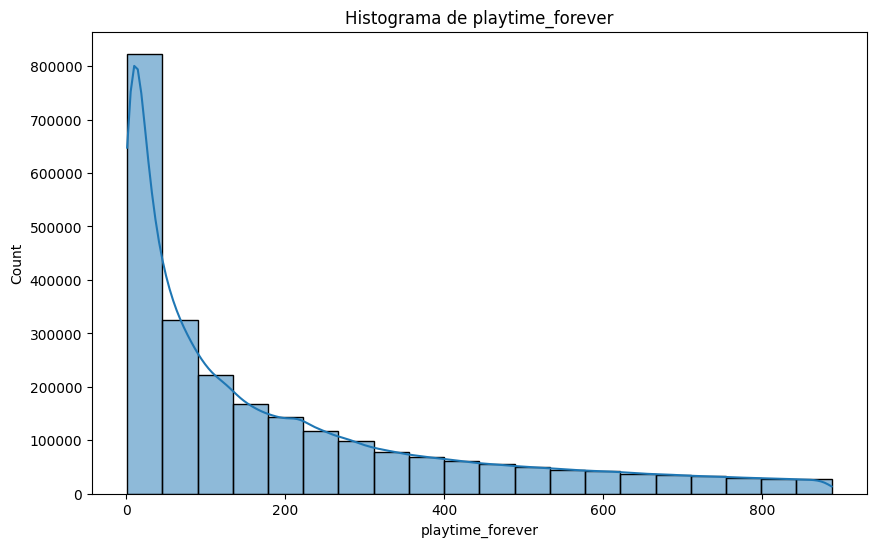

In [7]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(user_items['playtime_forever'], bins=20, kde=True)
plt.title('Histograma de playtime_forever')
plt.show()

El histograma de playtime_forever proporciona una visión general de la distribución del tiempo de juego dedicado por los usuarios a los juegos

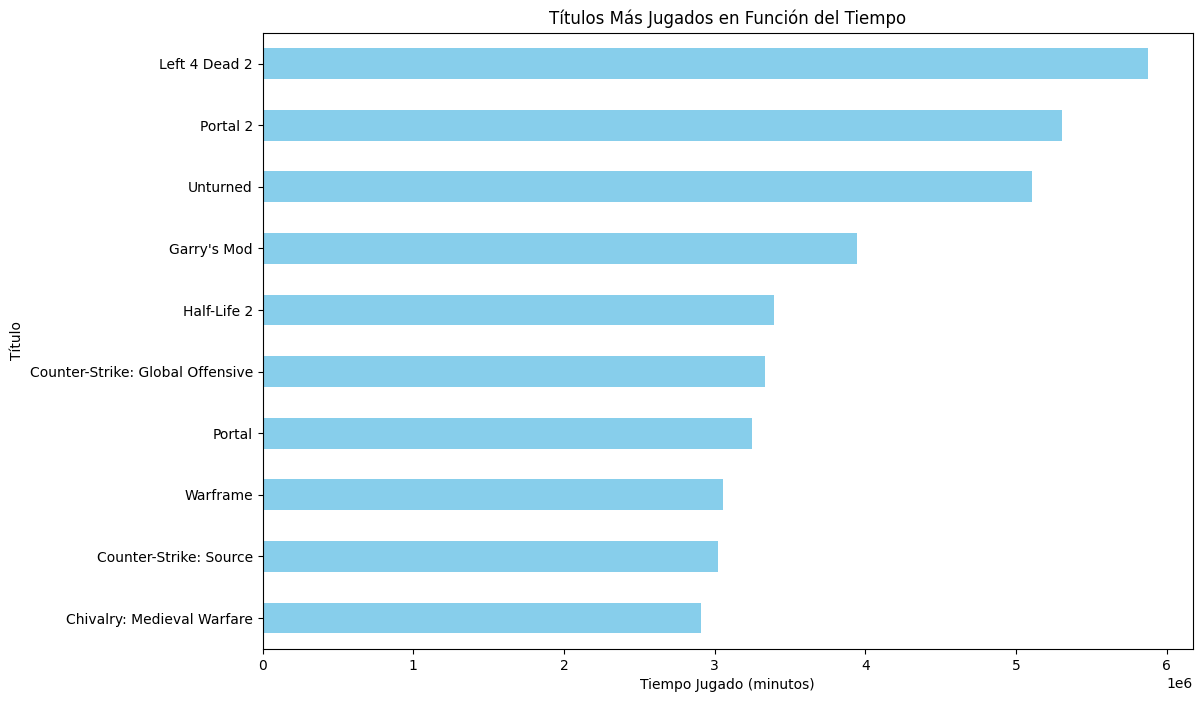

In [8]:
# Agrupa los datos por título y suma el tiempo jugado para cada título
titulos_mas_jugados = user_items.groupby('title')['playtime_forever'].sum().sort_values(ascending=False)

# Toma los primeros N títulos más jugados (por ejemplo, los primeros 10)
top_n_titulos = titulos_mas_jugados.head(10)

# Crea un gráfico de barras horizontal
plt.figure(figsize=(12, 8))
top_n_titulos.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Tiempo Jugado (minutos)')
plt.ylabel('Título')
plt.title('Títulos Más Jugados en Función del Tiempo')
plt.show()

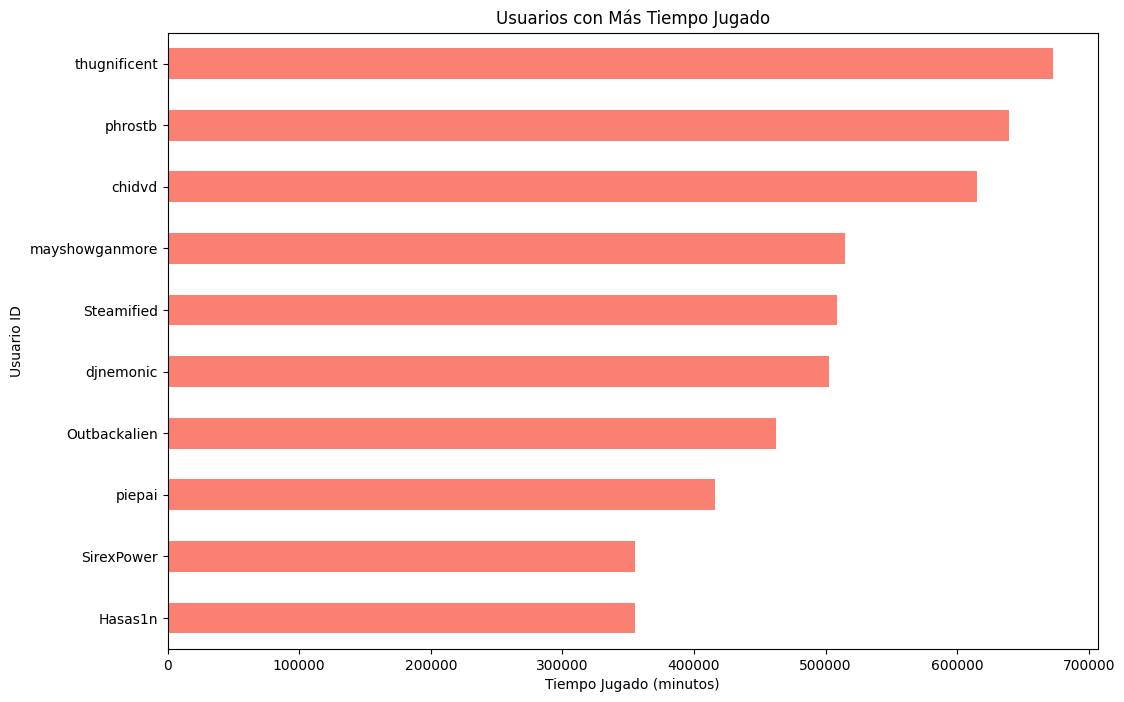

In [9]:
# Agrupa los datos por usuario y suma el tiempo jugado para cada usuario
tiempo_jugado_por_usuario = user_items.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False)

# Toma los primeros N usuarios con más tiempo jugado (por ejemplo, los primeros 10)
top_n_usuarios = tiempo_jugado_por_usuario.head(10)

# Crea un gráfico de barras
plt.figure(figsize=(12, 8))
top_n_usuarios.sort_values().plot(kind='barh', color='salmon')
plt.xlabel('Tiempo Jugado (minutos)')
plt.ylabel('Usuario ID')
plt.title('Usuarios con Más Tiempo Jugado')
plt.show()

Estos gráficos proporcionan insights visuales que facilitan la comprensión de patrones y tendencias en el uso del tiempo de juego, tanto a nivel de títulos como de usuarios. Esto puede ser útil para tomar decisiones informadas en áreas como desarrollo de juegos, marketing o personalización de experiencias

### **SEGUNDO DATAFRAME user_reviews**

In [10]:
user_reviews

,user_id,item_id,recommend,year_posted,sentiment_analysis
0,76561197970982479,1250,1,2011,2
1,76561197970982479,22200,1,2011,2
2,76561197970982479,43110,1,2011,2
3,js41637,251610,1,2014,2
4,js41637,227300,1,2013,2
...,...,...,...,...,...
58426,76561198312638244,70,1,2013,2
58427,76561198312638244,362890,1,2013,2
58428,LydiaMorley,273110,1,2013,2
58429,LydiaMorley,730,1,2013,2


In [11]:
user_reviews.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             58431 non-null  object
 1   item_id             58431 non-null  int64 
 2   recommend           58431 non-null  int32 
 3   year_posted         58431 non-null  int64 
 4   sentiment_analysis  58431 non-null  int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 2.0+ MB


In [12]:
user_reviews.isnull().sum() # obtenemos la cantidad de valores nulos por columna

user_id               0
item_id               0
recommend             0
year_posted           0
sentiment_analysis    0
dtype: int64

C:\Users\ramir\AppData\Local\Temp\ipykernel_12356\2911549610.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='recommend', data=user_reviews, palette='Set2')


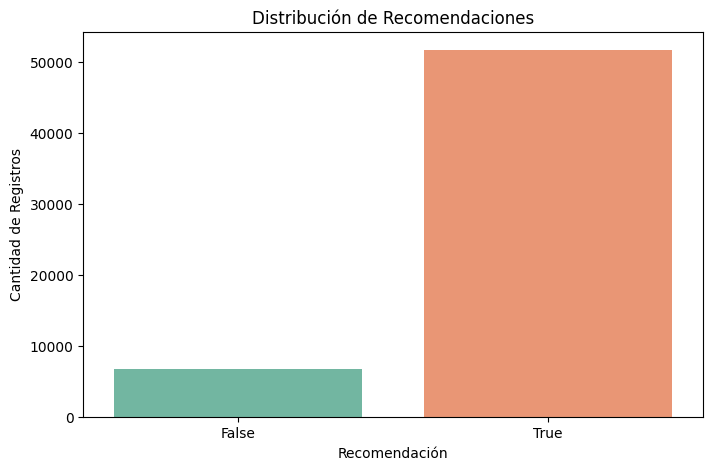

In [13]:
# Distribución de recomendaciones

# Crea el gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(x='recommend', data=user_reviews, palette='Set2')

# Cambia las etiquetas del eje x
plt.xticks([0, 1], ['False', 'True'])

# Añade títulos y etiquetas
plt.title('Distribución de Recomendaciones')
plt.xlabel('Recomendación')
plt.ylabel('Cantidad de Registros')

# Muestra el gráfico
plt.show()

Este gráfico te proporciona información sobre la distribución de recomendaciones en tus datos, permitiéndote visualizar cuántas recomendaciones positivas ('True') y cuántas negativas ('False') hay

C:\Users\ramir\AppData\Local\Temp\ipykernel_12356\3083239288.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_posted', data=user_reviews, palette='coolwarm')


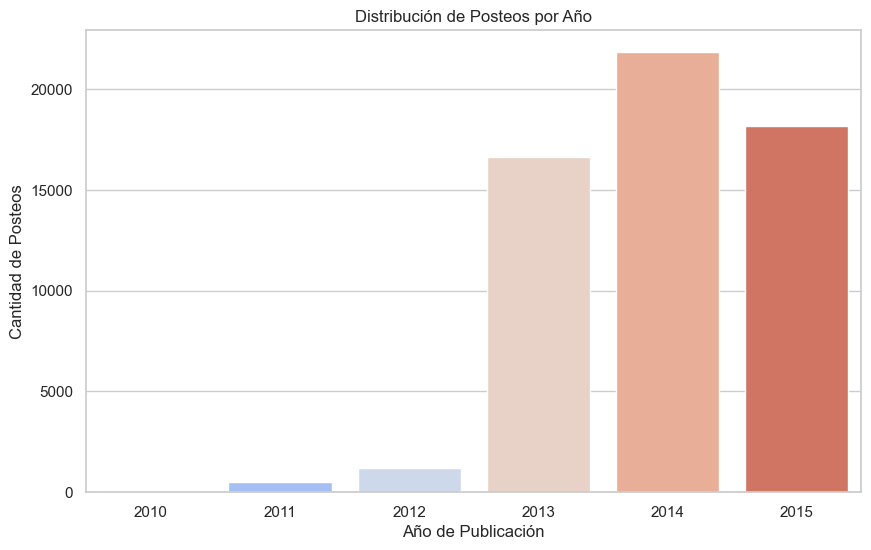

In [14]:
# Configurar el estilo de los gráficos usando Seaborn
sns.set(style="whitegrid")

# Gráfico de Distribución de Posteos por Año
plt.figure(figsize=(10, 6))
sns.countplot(x='year_posted', data=user_reviews, palette='coolwarm')
plt.title('Distribución de Posteos por Año')
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Posteos')
plt.show()

El año con más posteos fue 2014 

C:\Users\ramir\AppData\Local\Temp\ipykernel_12356\2478754867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_analysis', data=user_reviews, palette='muted')


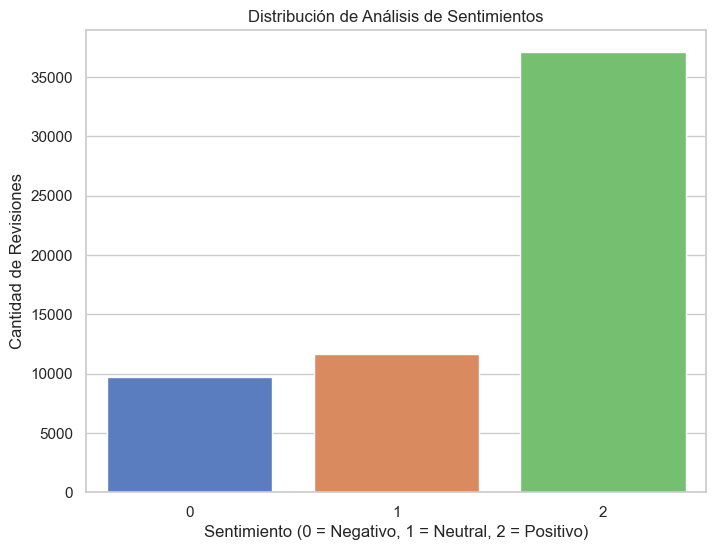

In [15]:
# Distribución de Análisis de Sentimientos
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_analysis', data=user_reviews, palette='muted')
plt.title('Distribución de Análisis de Sentimientos')
plt.xlabel('Sentimiento (0 = Negativo, 1 = Neutral, 2 = Positivo)')
plt.ylabel('Cantidad de Revisiones')
plt.show()

Este gráfico proporciona una visión rápida de cómo se distribuyen los diferentes sentimientos en tus revisiones, ayudándote a entender la percepción general de los usuarios sobre los juegos en tu conjunto de datos donde 0 indica sentimiento negativo, 1 es neutral y 2 es positivo

### **TERCER DATAFRAME steam_games**

In [16]:
steam_games

,item_id,title,genres,release_date,developer,year_release
0,761140,Lost Summoner Kitty,Action,2018-01-04,Kotoshiro,2018
1,761140,Lost Summoner Kitty,Casual,2018-01-04,Kotoshiro,2018
2,761140,Lost Summoner Kitty,Indie,2018-01-04,Kotoshiro,2018
3,761140,Lost Summoner Kitty,Simulation,2018-01-04,Kotoshiro,2018
4,761140,Lost Summoner Kitty,Strategy,2018-01-04,Kotoshiro,2018
...,...,...,...,...,...,...
69745,610660,Russian Roads,Indie,2018-01-04,Laush Dmitriy Sergeevich,2018
69746,610660,Russian Roads,Racing,2018-01-04,Laush Dmitriy Sergeevich,2018
69747,610660,Russian Roads,Simulation,2018-01-04,Laush Dmitriy Sergeevich,2018
69748,658870,EXIT 2 - Directions,Casual,2017-09-02,"xropi,stev3ns",2017


In [17]:
steam_games.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69750 entries, 0 to 69749
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   item_id       69750 non-null  int64         
 1   title         69750 non-null  object        
 2   genres        69750 non-null  object        
 3   release_date  69750 non-null  datetime64[ns]
 4   developer     69750 non-null  object        
 5   year_release  69750 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(3)
memory usage: 2.9+ MB


In [18]:
steam_games.isnull().sum() # obtenemos la cantidad de valores nulos por columna

item_id         0
title           0
genres          0
release_date    0
developer       0
year_release    0
dtype: int64

C:\Users\ramir\AppData\Local\Temp\ipykernel_12356\1811017368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='developer', data=steam_games, order=steam_games['developer'].value_counts().index[:10], palette='viridis')


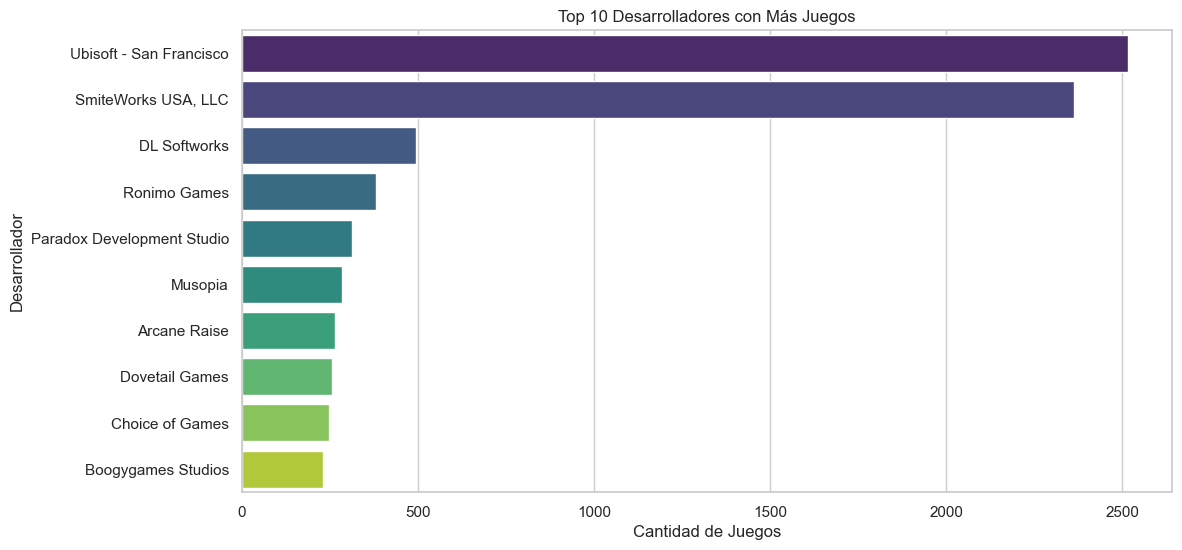

In [19]:
# Gráfico de barras para contar la cantidad de juegos por categoría
plt.figure(figsize=(12, 6))
sns.countplot(y='developer', data=steam_games, order=steam_games['developer'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Desarrolladores con Más Juegos')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Desarrollador')
plt.show()

Este gráfico muestra los 10 principales desarrolladores con más juegos en el conjunto de datos

C:\Users\ramir\AppData\Local\Temp\ipykernel_12356\1479412685.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genres', data=steam_games, palette='muted')


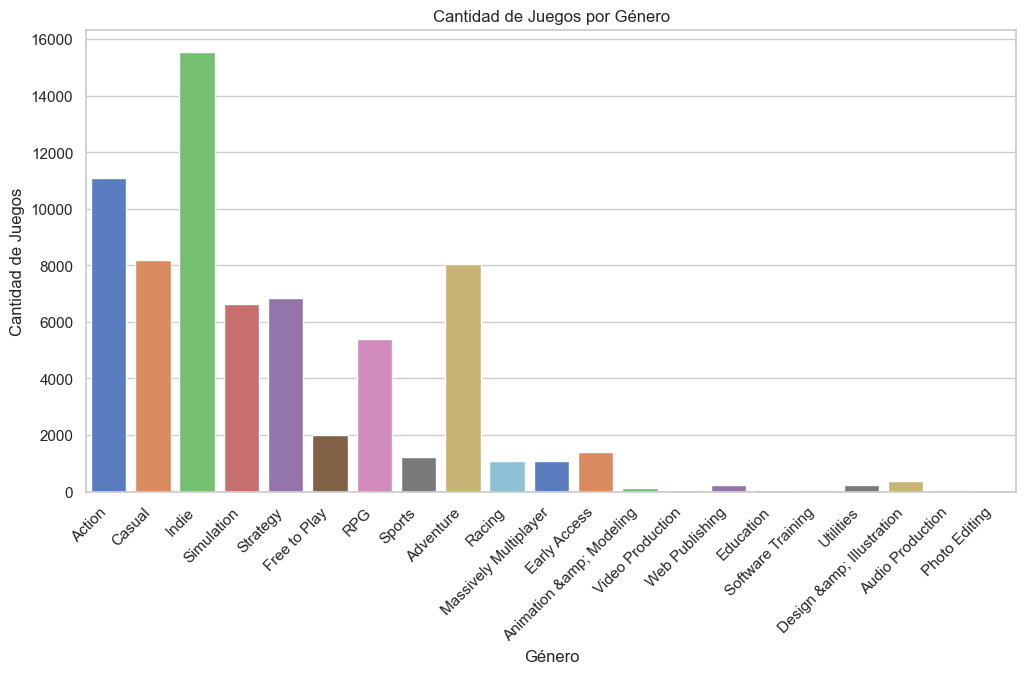

In [20]:
# Gráfico de barras para mostrar la cantidad de juegos por género
plt.figure(figsize=(12, 6))
sns.countplot(x='genres', data=steam_games, palette='muted')
plt.title('Cantidad de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()


Este gráfico nos permitirá visualizar la distribución de juegos según su género.

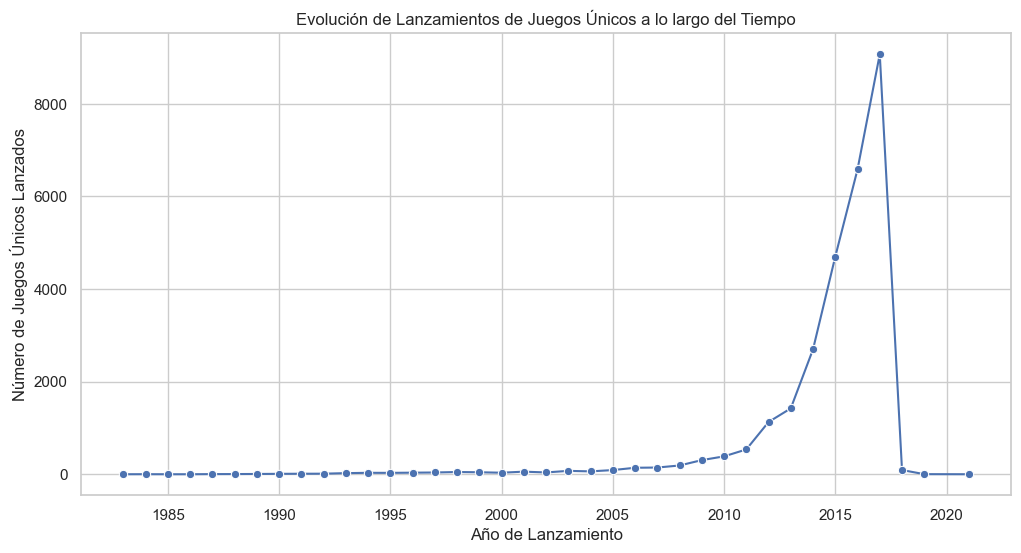

In [21]:
# Contar la cantidad única de juegos lanzados por año
unique_games_by_year = steam_games.groupby('year_release')['item_id'].nunique()

# Gráfico de líneas para mostrar la evolución de lanzamientos de juegos únicos a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x=unique_games_by_year.index, y=unique_games_by_year.values, marker='o', color='b')
plt.title('Evolución de Lanzamientos de Juegos Únicos a lo largo del Tiempo')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos Únicos Lanzados')
plt.show()

Este gráfico nos ofrece una visión temporal de la cantidad de juegos lanzados cada año, permitiéndonos identificar patrones, tendencias o períodos de mayor actividad en la industria de los videojuegos